Machine Learning Project - 7: **Customer_Segmentation using K-Means Clustering**

**Load Data into Collab:**

In [ ]:
import pandas as pd

df = pd.read_csv("customers.csv")

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  20                      81
2           3  Female   30                  40                      50


**Visualize Data:**

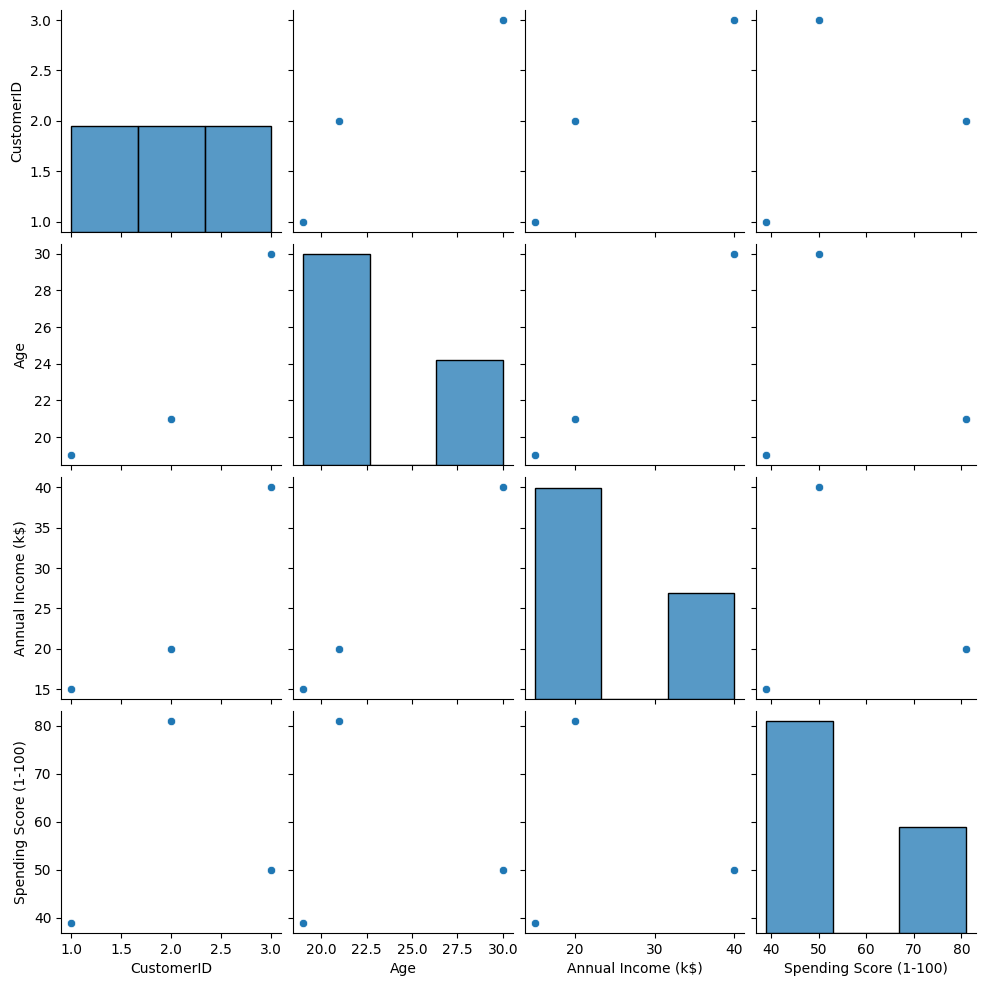

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

**Feature Scaling (Normalization):**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:5])                  #Check first few rows  after scaling

**Find the Optimal Number of Clusters (Elbow Method):**

In [ ]:
from sklearn.cluster import KMeans

# Find the Optimal Number of Clusters (Elbow Method):
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1,11), wcss, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

**Train K-Means Model:**

In [ ]:
# Choose the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels into the dataset
df["Cluster"] = clusters

print(df.head()) # Check  assigned clusters

**Visualize Customer Segments:**

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score ")
plt.show()